In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv('data/tmp.csv')
data['title'] = data['name'].str.split(',').str[1].str.split('.').str[0].str.strip()
data['given_name'] = data['name'].str.split(',').str[1].str.split('.').str[1].str.split('\(')\
                     .str[0].str.strip()
data['family_name'] = data['name'].str.split(',').str[0].str.strip()

title_map = {'Mr':0,'Miss':0,'Mrs':0,'Master':0,'Rev':0,'Dr':0}

titles = ['Mr','Miss','Mrs','Master','Rev','Dr']

def title_normalize(x):
    title_dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }
    return title_dictionary.get(x) or 'Unknown'

data.title = np.vectorize(title_normalize)(data.title)    

default_age_by_title = data.groupby(['title'])['age'].median().reset_index(name="med")
at_dict = default_age_by_title.to_dict()

mapping = {at_dict['title'][i]:at_dict['med'][i] for i in xrange(len(at_dict['med']))}
print mapping
mapping.get("dro") or mapping.get("Unknown")
def age_estimate(age_val, title_val):
    res = age_val
#     print res, math.isnan(res), title_val
    if math.isnan(res):
        res = mapping.get(title_val) or mapping.get("Unknown")
#     print res
#     print '----------------'
    return res

data.age = np.vectorize(age_estimate)(data.age, data.title)

def check_cabin(cabin_num):
    return 1 if cabin_num else 0

data['has_cabin_num'] = np.vectorize(check_cabin)(data.cabin)


data

{'Mrs': 35.0, 'Royalty': 39.5, 'Master': 4.0, 'Officer': 49.5, 'Mr': 29.0, 'Miss': 22.0}


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,given_name,family_name,has_cabin_num
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,Elisabeth Walton,Allen,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,Hudson Trevor,Allison,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,Helen Loraine,Allison,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,Hudson Joshua Creighton,Allison,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,Hudson J C,Allison,1
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Mr,Harry,Anderson,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Miss,Kornelia Theodosia,Andrews,1
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Mr,Thomas Jr,Andrews,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Mrs,Edward Dale,Appleton,1
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Mr,Ramon,Artagaveytia,1


In [18]:
title_normalize('Dr')

'Officer'

In [9]:
data.fare.max()

512.32920000000001

In [17]:
data.sex[data.age >=60].value_counts()



male      29
female    11
Name: sex, dtype: int64

In [18]:
data.sex[data.age >=60][data.survived == 1].value_counts()

female    9
male      3
Name: sex, dtype: int64

In [8]:
data.pclass[data.title=='Other'].value_counts()

1    16
3     1
2     1
Name: pclass, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
pclass           1309 non-null int64
survived         1309 non-null int64
name             1309 non-null object
sex              1309 non-null object
age              1309 non-null float64
sibsp            1309 non-null int64
parch            1309 non-null int64
ticket           1309 non-null object
fare             1308 non-null float64
cabin            295 non-null object
embarked         1307 non-null object
boat             486 non-null object
body             121 non-null float64
home.dest        745 non-null object
title            1309 non-null object
given_name       1309 non-null object
family_name      1309 non-null object
has_cabin_num    1309 non-null int64
dtypes: float64(3), int64(5), object(10)
memory usage: 184.1+ KB


In [4]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_num
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,121.000000,1309.0
mean,2.294882,0.381971,29.445508,0.498854,0.385027,33.295479,160.809917,1.0
std,0.837836,0.486055,13.170737,1.041658,0.865560,51.758668,97.696922,0.0
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000,1.0
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,1.0
50%,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,155.000000,1.0
75%,3.000000,1.000000,35.500000,1.000000,0.000000,31.275000,256.000000,1.0
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.0


In [198]:
data.cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C78                4
C22 C26            4
F4                 4
F2                 4
B96 B98            4
F33                4
C101               3
E101               3
A34                3
B51 B53 B55        3
E34                3
B58 B60            3
F G73              2
C126               2
C124               2
C123               2
B5                 2
C125               2
D36                2
C54                2
C52                2
D28                2
B22                2
D37                2
C6                 2
D33                2
                  ..
A10                1
C47                1
C90                1
B94                1
C50                1
B37                1
E63                1
D56                1
A19                1
A20                1
A21                1
B61                1
A23                1
A24                1
A26                1
D49                1
B26          

In [77]:
# len(data[data.parch > 0][data.sibsp >0 ])
data[data.parch > 0][data.sibsp >0 ]
# age > 21 , parch > 0

# male parch > 0 , alive: dead = 15:18
# len(data[data.parch == 0][data.survived ==1][data.sex=='male'])

/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,given_name,family_name
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,Hudson Trevor,Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,Helen Loraine,Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,Hudson Joshua Creighton,Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,Hudson J C,Allison
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Mr,Richard Leonard,Beckwith
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.00,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Mrs,Richard Leonard,Beckwith
54,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",Master,William Thornton II,Carter
55,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",Miss,Lucile Polk,Carter
56,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S,C,NaN,"Bryn Mawr, PA",Mr,William Ernest,Carter
57,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.00,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",Mrs,William Ernest,Carter


In [18]:
data[data.cabin=='C22 C26']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,given_name,family_name
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,Hudson Trevor,Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,Helen Loraine,Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,Hudson Joshua Creighton,Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,Hudson J C,Allison


In [14]:
data.title.value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: title, dtype: int64

In [152]:
x = data.groupby(['title'])['age'].median().reset_index(name="med")
x.med[x.title=='Dddr']

# x = data.groupby('title').age.agg(['median']).rename(columns={'median':'med_age'})

# x = data.groupby(['title', 'age']).agg({'med':median})


# x

Series([], Name: med, dtype: float64)

In [51]:
data.age[data.title=='Master'].mean()

5.4826415094339618

In [50]:
data[data.title=='Master'].describe()

,pclass,survived,age,sibsp,parch,fare,body
count,61.000000,61.000000,53.000000,61.000000,61.000000,61.000000,3.00000
mean,2.655738,0.508197,5.482642,2.049180,1.377049,36.008195,24.00000
std,0.629424,0.504082,4.161554,1.961515,0.552688,40.677102,37.26929
min,1.000000,0.000000,0.330000,0.000000,0.000000,3.170800,1.00000
25%,2.000000,0.000000,2.000000,1.000000,1.000000,15.245800,2.50000
50%,3.000000,1.000000,4.000000,1.000000,1.000000,26.000000,4.00000
75%,3.000000,1.000000,9.000000,4.000000,2.000000,36.750000,35.50000
max,3.000000,1.000000,14.500000,8.000000,2.000000,262.375000,67.00000


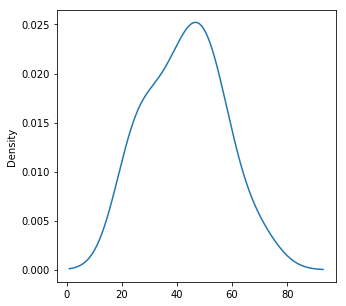

          pclass   survived        age      sibsp      parch        fare  \
count  18.000000  18.000000  17.000000  18.000000  18.000000   18.000000   
mean    1.166667   0.611111  42.941176   0.222222   0.055556   54.146067   
std     0.514496   0.501631  13.479014   0.427793   0.235702   51.821270   
min     1.000000   0.000000  24.000000   0.000000   0.000000    0.000000   
25%     1.000000   0.000000  33.000000   0.000000   0.000000   26.842700   
50%     1.000000   1.000000  45.000000   0.000000   0.000000   37.550000   
75%     1.000000   1.000000  52.000000   0.000000   0.000000   69.300000   
max     3.000000   1.000000  70.000000   1.000000   1.000000  227.525000   

             body  
count    2.000000  
mean   196.500000  
std    102.530483  
min    124.000000  
25%    160.250000  
50%    196.500000  
75%    232.750000  
max    269.000000  


In [79]:
fig = plt.figure(figsize=(5,5))
fig.set(alpha = 0.2)


data.age[data.title=='Other'].plot(kind='kde')
plt.show()
print data[data.title=='Other'].describe()

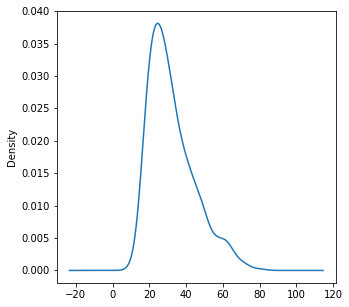

           pclass    survived         age       sibsp       parch        fare  \
count  757.000000  757.000000  581.000000  757.000000  757.000000  756.000000   
mean     2.381770    0.162483   32.252151    0.282695    0.159841   24.796185   
std      0.810536    0.369138   12.422089    0.746689    0.648216   42.237847   
min      1.000000    0.000000   11.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   23.000000    0.000000    0.000000    7.827100   
50%      3.000000    0.000000   29.000000    0.000000    0.000000    9.593750   
75%      3.000000    0.000000   39.000000    0.000000    0.000000   26.000000   
max      3.000000    1.000000   80.000000    8.000000    9.000000  512.329200   

             body  
count  106.000000  
mean   162.792453  
std     94.324841  
min      9.000000  
25%     80.250000  
50%    155.500000  
75%    255.750000  
max    322.000000  


In [60]:
fig = plt.figure(figsize=(5,5))
fig.set(alpha = 0.2)


data.age[data.title=='Mr'].plot(kind='kde')
plt.show()
print data[data.title=='Mr'].describe()

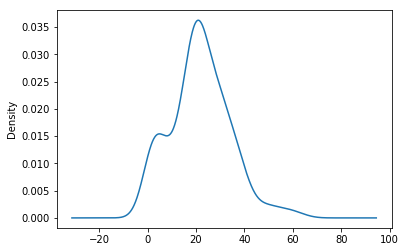

,pclass,survived,age,sibsp,parch,fare,body
count,260.000000,260.000000,210.000000,260.000000,260.000000,260.000000,3.000000
mean,2.346154,0.676923,21.774238,0.665385,0.503846,42.684873,229.333333
std,0.830979,0.468554,12.249077,1.380907,0.773590,65.659665,146.500284
min,1.000000,0.000000,0.170000,0.000000,0.000000,6.750000,61.000000
25%,2.000000,0.000000,15.000000,0.000000,0.000000,7.891650,180.000000
50%,3.000000,1.000000,22.000000,0.000000,0.000000,15.245800,299.000000
75%,3.000000,1.000000,30.000000,1.000000,1.000000,39.000000,313.500000
max,3.000000,1.000000,63.000000,8.000000,2.000000,512.329200,328.000000


In [61]:

data.age[data.title=='Miss'].plot(kind='kde')
plt.show()
data[data.title=='Miss'].describe()



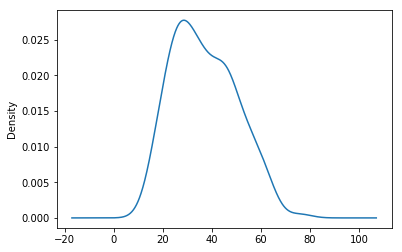

           pclass    survived         age       sibsp       parch        fare  \
count  197.000000  197.000000  170.000000  197.000000  197.000000  197.000000   
mean     1.939086    0.786802   36.994118    0.659898    0.832487   50.560723   
std      0.848976    0.410610   12.901767    0.581225    1.319926   61.009459   
min      1.000000    0.000000   14.000000    0.000000    0.000000    7.000000   
25%      1.000000    1.000000   27.000000    0.000000    0.000000   15.850000   
50%      2.000000    1.000000   35.500000    1.000000    0.000000   26.000000   
75%      3.000000    1.000000   46.500000    1.000000    1.000000   60.000000   
max      3.000000    1.000000   76.000000    3.000000    9.000000  512.329200   

             body  
count    5.000000  
mean   129.000000  
std    133.904817  
min      7.000000  
25%     52.000000  
50%     53.000000  
75%    206.000000  
max    327.000000  
35.5
0    45.0
dtype: float64
22.0


In [71]:
data.age[data.title=='Mrs'].plot(kind='kde')
plt.show()
print data[data.title=='Mrs'].describe()
print data.age[data.title=='Mrs'].median()
print data.age[data.title=='Mrs'].mode()
print data.age[data.title=='Mrs'].quantile(0.1)



In [130]:
data[data.family_name=='Nasser']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,given_name,family_name
512,2,0,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,NaN,43.0,"New York, NY",Mr,Nicholas,Nasser
513,2,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,NaN,"New York, NY",Mrs,Nicholas,Nasser


In [124]:
data[data.title=='Master'].describe()

,pclass,survived,age,sibsp,parch,fare,body
count,61.000000,61.000000,53.000000,61.000000,61.000000,61.000000,3.00000
mean,2.655738,0.508197,5.482642,2.049180,1.377049,36.008195,24.00000
std,0.629424,0.504082,4.161554,1.961515,0.552688,40.677102,37.26929
min,1.000000,0.000000,0.330000,0.000000,0.000000,3.170800,1.00000
25%,2.000000,0.000000,2.000000,1.000000,1.000000,15.245800,2.50000
50%,3.000000,1.000000,4.000000,1.000000,1.000000,26.000000,4.00000
75%,3.000000,1.000000,9.000000,4.000000,2.000000,36.750000,35.50000
max,3.000000,1.000000,14.500000,8.000000,2.000000,262.375000,67.00000


In [125]:
data[data.title=='Rev'].describe()

,pclass,survived,age,sibsp,parch,fare,body
count,8.0,8.0,8.000000,8.00000,8.00000,8.000000,1.0
mean,2.0,0.0,41.250000,0.25000,0.25000,18.609375,174.0
std,0.0,0.0,12.020815,0.46291,0.46291,8.340327,NaN
min,2.0,0.0,27.000000,0.00000,0.00000,12.350000,174.0
25%,2.0,0.0,29.500000,0.00000,0.00000,12.881250,174.0
50%,2.0,0.0,41.500000,0.00000,0.00000,13.000000,174.0
75%,2.0,0.0,51.750000,0.25000,0.25000,26.000000,174.0
max,2.0,0.0,57.000000,1.00000,1.00000,33.000000,174.0


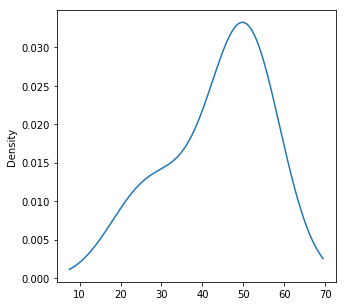

In [57]:
fig = plt.figure(figsize=(5,5))
fig.set(alpha = 0.2)
data[data.title=='Dr'].describe()

data.age[data.title=='Dr'].plot(kind='kde')
plt.show()

In [48]:
import math
def fill_value(x, y):
    add_value = 99.0
    if y > 2:
        add_value = 500.0
    if math.isnan(x):
        return 0.0
    else:
        return x+add_value

df = pd.DataFrame([[np.nan, 2, np.nan, 0],\
                   [3, 4, np.nan, 1],\
                    [np.nan, 1, np.nan, 5],\
                    [np.nan, 3, np.nan, 4]],\
                    columns=list('ABCD'))
mapping = {'jack': 4098, 'sape': 4139}
df['new'] = np.vectorize(fill_value)(df['A'], df['B'])
df
# ffill(100)

,A,B,C,D,new
0,NaN,2,NaN,0,0.0
1,3.0,4,NaN,1,503.0
2,NaN,1,NaN,5,0.0
3,NaN,3,NaN,4,0.0


In [210]:
print len(data[data.cabin.isnull()])
print len(data[data.cabin.isnull()][data.survived==1])
print len(data[data.cabin.isnull()][data.survived==1])*1.0/len(data[data.cabin.isnull()])

1014
307
0.302761341223


/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
print len(data[data.cabin.notnull()])
print len(data[data.cabin.notnull()][data.survived==1])
print len(data[data.cabin.notnull()][data.survived==1])*1.0/len(data[data.cabin.notnull()])

295
193
0.654237288136


/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
data.pclass.value_counts().sort_index()

1    323
2    277
3    709
Name: pclass, dtype: int64

In [25]:
data.pclass[data.cabin.isnull()].value_counts().sort_index()

1     67
2    254
3    693
Name: pclass, dtype: int64

In [28]:
data.pclass[data.cabin.isnull()].value_counts().sort_index()/data.pclass.value_counts().sort_index()

1    0.207430
2    0.916968
3    0.977433
Name: pclass, dtype: float64

In [31]:
data.pclass[data.cabin.isnull()][data.survived==1].value_counts().sort_index()

1     33
2    102
3    172
Name: pclass, dtype: int64

In [32]:
data.pclass[data.cabin.isnull()][data.survived==1].value_counts().sort_index()/data.pclass[data.cabin.isnull()].value_counts().sort_index()

1    0.492537
2    0.401575
3    0.248196
Name: pclass, dtype: float64

In [21]:
data.pclass[data.cabin.notnull()].value_counts().sort_index()

1    256
2     23
3     16
Name: pclass, dtype: int64

In [27]:
data.pclass[data.cabin.notnull()][data.survived==1].value_counts().sort_index()

1    167
2     17
3      9
Name: pclass, dtype: int64

In [33]:
data.pclass[data.cabin.notnull()][data.survived==1].value_counts().sort_index()/data.pclass[data.cabin.notnull()].value_counts().sort_index()

1    0.652344
2    0.739130
3    0.562500
Name: pclass, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
pclass         1309 non-null int64
survived       1309 non-null int64
name           1309 non-null object
sex            1309 non-null object
age            1046 non-null float64
sibsp          1309 non-null int64
parch          1309 non-null int64
ticket         1309 non-null object
fare           1308 non-null float64
cabin          295 non-null object
embarked       1307 non-null object
boat           486 non-null object
body           121 non-null float64
home.dest      745 non-null object
title          1309 non-null object
given_name     1309 non-null object
family_name    1309 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 173.9+ KB


In [142]:
data[data.title=='Dr']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,given_name,family_name
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",Dr,Arthur Jackson,Brewe
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,13,NaN,"San Francisco, CA",Dr,Washington,Dodge
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY",Dr,Henry William,Frauenthal
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,8,NaN,"New York, NY",Dr,Alice,Leader
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI",Dr,William Edward,Minahan
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",Dr,Max,Stahelin-Maeglin
508,2,0,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY",Dr,Ernest,Moraweck
525,2,0,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON",Dr,Alfred,Pain


In [139]:
data[data.title=='Mme']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,given_name,family_name
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,9,NaN,"Paris, France",Mme,Leontine Pauline,Aubart


In [146]:
data.family_name[data.survived==1].value_counts()

Brown                     5
Carter                    4
Becker                    4
Fortune                   4
Baclini                   4
Ryerson                   4
Asplund                   4
Dodge                     3
Spedden                   3
Peter                     3
Johnson                   3
Quick                     3
McCoy                     3
Coutts                    3
Laroche                   3
Frauenthal                3
Herman                    3
Daly                      3
Moubarek                  3
Caldwell                  3
West                      3
Dean                      3
Kelly                     3
Nakid                     3
Harper                    3
Kink-Heilmann             3
Sandstrom                 3
Murphy                    3
Richards                  3
Touma                     3
                         ..
Lundin                    1
Bowerman                  1
Kennedy                   1
Lindstrom                 1
Stephenson          

In [149]:
data[data.family_name=='Brown']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,given_name,family_name
41,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C,6,NaN,"Denver, CO",Mrs,James Joseph,Brown
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA",Mrs,John Murray,Brown
349,2,1,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S,11,NaN,"London / Montreal, PQ",Miss,"Amelia ""Mildred""",Brown
350,2,1,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,NaN,S,14,NaN,"Cape Town, South Africa / Seattle, WA",Miss,Edith Eileen,Brown
351,2,0,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S,NaN,NaN,"Cape Town, South Africa / Seattle, WA",Mr,Thomas William Solomon,Brown
352,2,1,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S,14,NaN,"Cape Town, South Africa / Seattle, WA",Mrs,Thomas William Solomon,Brown


In [140]:
data.title[data.survived==1].value_counts()

Miss            176
Mrs             155
Mr              123
Master           31
Dr                4
Col               2
Mlle              2
Mme               1
Dona              1
Lady              1
the Countess      1
Major             1
Ms                1
Sir               1
Name: title, dtype: int64

In [141]:
data.title[data.survived==0].value_counts()

Mr          634
Miss         84
Mrs          42
Master       30
Rev           8
Dr            4
Col           2
Jonkheer      1
Major         1
Ms            1
Don           1
Capt          1
Name: title, dtype: int64

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: title, dtype: int64

In [33]:
data.info()
data.pclass.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


3    709
1    323
2    277
Name: pclass, dtype: int64

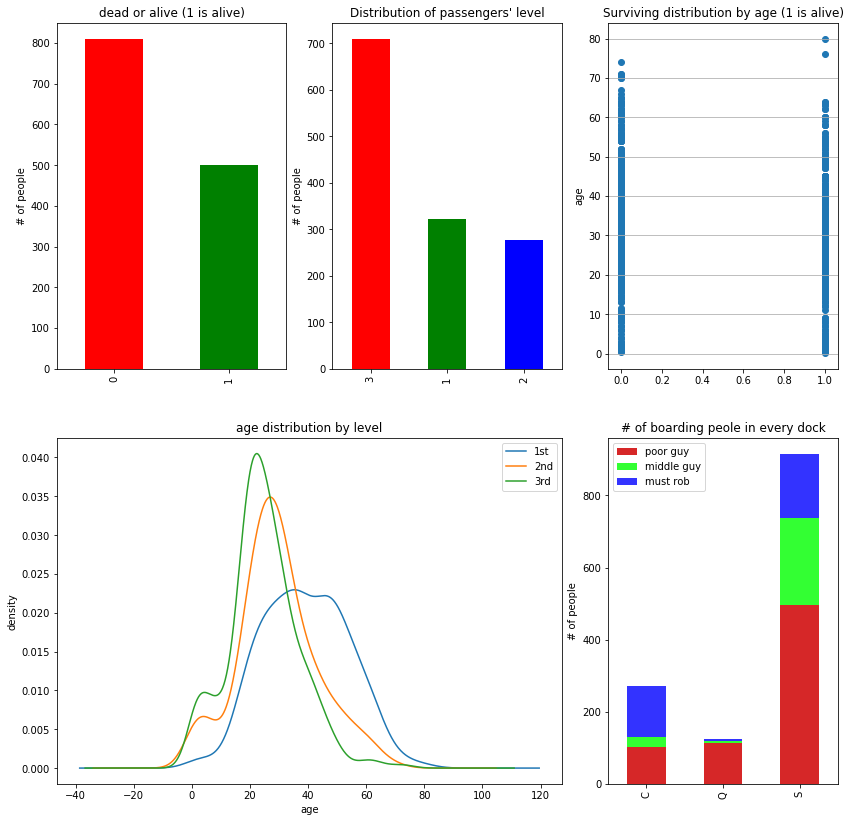

-----1st------
C    141
Q      3
S    177
Name: embarked, dtype: int64
-----2nd------
C     28
Q      7
S    242
Name: embarked, dtype: int64
-----3rd------
C    101
Q    113
S    495
Name: embarked, dtype: int64


In [34]:
# data[data.ticket=='1601']fig = plt.figure(figsize=(14,14))
fig = plt.figure(figsize=(14,14))
fig.set(alpha = 0.2)

my_colors = 'rgbkymc'  #red, green, blue, black, etc.

plt.subplot2grid((2, 3), (0,0))
data.survived.value_counts().plot(kind='bar',color=my_colors,)
plt.title("dead or alive (1 is alive)")
plt.ylabel("# of people")

plt.subplot2grid((2,3),(0,1))
data.pclass.value_counts().plot(kind='bar',color=my_colors,)
plt.ylabel("# of people")
plt.title("Distribution of passengers' level")

plt.subplot2grid((2,3), (0,2))
plt.scatter(data.survived, data.age)
plt.ylabel("age")
plt.grid(b=True, which='major', axis='y')
plt.title("Surviving distribution by age (1 is alive)")

plt.subplot2grid((2,3),(1,0), colspan=2)
data.age[data.pclass == 1].plot(kind='kde')   
data.age[data.pclass == 2].plot(kind='kde')
data.age[data.pclass == 3].plot(kind='kde')
plt.xlabel("age")# plots an axis lable
plt.ylabel("density") 
plt.title("age distribution by level")
plt.legend(("1st", "2nd" ,"3rd"),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
first_class_stats = data.embarked[data.pclass == 1].value_counts().sort_index()
second_class_stats = data.embarked[data.pclass == 2].value_counts().sort_index()
third_class_stats = data.embarked[data.pclass == 3].value_counts().sort_index()
p3 = third_class_stats.plot(kind='bar', color='#d62728')
p2 = second_class_stats.plot(kind='bar',bottom=third_class_stats, color='#33ff33')
p1 = first_class_stats.plot(kind='bar',bottom=second_class_stats+third_class_stats, color='#3333ff')
plt.legend(("poor guy", "middle guy" ,"must rob"),loc='best')

plt.title("# of boarding peole in every dock")
plt.ylabel("# of people")  
plt.show()

print '-----1st------'
print first_class_stats
print '-----2nd------'
print second_class_stats
print '-----3rd------'
print third_class_stats



In [35]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


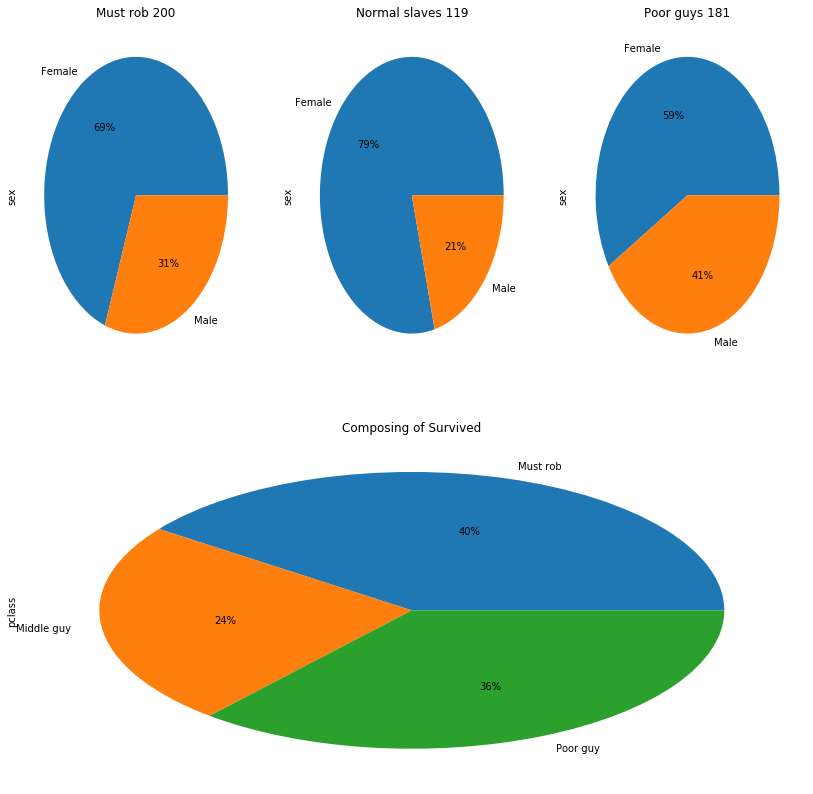

Total survived is  500
Survived ratio
1    0.400
2    0.238
3    0.362
Name: pclass, dtype: float64
------------------
Survived count
1    200
2    119
3    181
Name: pclass, dtype: int64
------------------
People in each Pclass
1    323
2    277
3    709
Name: pclass, dtype: int64
------------------
Survived ratio in each Pclass
1    0.619195
2    0.429603
3    0.255289
Name: pclass, dtype: float64
------------------


In [36]:
fig = plt.figure(figsize=(14,14))
sv = data.pclass[data.survived==1].value_counts().sort_index()
all_passengers = data.pclass.value_counts().sort_index()

# plt.subplot2grid((2, 3), (0,0))
plt.subplot2grid((2, 3), (0,0))
sex_labels = 'Female', 'Male'
data.sex[data.survived==1][data.pclass==1].value_counts()\
    .sort_index().plot.pie(labels=sex_labels, autopct='%1.0f%%')
plt.title("Must rob "+str(len(data.sex[data.survived==1][data.pclass==1])))
plt.subplot2grid((2, 3), (0,1))
sex_labels = 'Female', 'Male'
data.sex[data.survived==1][data.pclass==2].value_counts()\
    .sort_index().plot.pie(labels=sex_labels, autopct='%1.0f%%')
plt.title("Normal slaves "+str(len(data.sex[data.survived==1][data.pclass==2])))

plt.subplot2grid((2, 3), (0,2))
sex_labels = 'Female', 'Male'
data.sex[data.survived==1][data.pclass==3].value_counts()\
    .sort_index().plot.pie(labels=sex_labels, autopct='%1.0f%%')
plt.title("Poor guys "+str(len(data.sex[data.survived==1][data.pclass==3])))



plt.subplot2grid((2, 3), (1,0), colspan=3)
sv_ratio = sv/sv.sum()
labels = 'Must rob', 'Middle guy', 'Poor guy'
sv_ratio.plot.pie(labels=labels, autopct='%1.0f%%')
plt.title("Composing of Survived")

plt.show()
print "Total survived is ",sv.sum()



print "Survived ratio"
print sv_ratio
print "------------------"


print "Survived count"
print sv
print "------------------"

print "People in each Pclass"
print all_passengers
print "------------------"
print "Survived ratio in each Pclass"
print sv/all_passengers
print "------------------"

In [55]:
print data.sex[data.pclass==1].value_counts().sort_index()
print data.sex[data.pclass==2].value_counts().sort_index()
print data.sex[data.pclass==3].value_counts().sort_index()

female    144
male      179
Name: sex, dtype: int64
female    106
male      171
Name: sex, dtype: int64
female    216
male      493
Name: sex, dtype: int64


In [65]:
print '-------1st-----------'
print data.sex[data.pclass==1][data.age.notnull()][data.age >=16].value_counts().sort_index()
print data.sex[data.pclass==1][data.age < 16].value_counts().sort_index()
print data.sex[data.pclass==1].value_counts().sort_index()
print '-------1st survive-----------'
print data.sex[data.survived==1][data.pclass==1][data.age >=16].value_counts().sort_index()
print data.sex[data.survived==1][data.pclass==1][data.age < 16].value_counts().sort_index()
print data.sex[data.survived==1][data.pclass==1].value_counts().sort_index()
print '-------1st dead-----------'
print data.sex[data.survived==0][data.pclass==1][data.age >=16].value_counts().sort_index()
print data.sex[data.survived==0][data.pclass==1][data.age < 16].value_counts().sort_index()
print data.sex[data.survived==0][data.pclass==1].value_counts().sort_index()

print '-------2nd--------------'
print data.sex[data.pclass==2][data.age >=16].value_counts().sort_index()
print data.sex[data.pclass==2][data.age < 16].value_counts().sort_index()
print data.sex[data.pclass==2].value_counts().sort_index()
print '-------2nd survive-----------'
print data.sex[data.survived==1][data.pclass==2][data.age >=16].value_counts().sort_index()
print data.sex[data.survived==1][data.pclass==2][data.age < 16].value_counts().sort_index()
print data.sex[data.survived==1][data.pclass==2].value_counts().sort_index()
print '-------2nd dead-----------'
print data.sex[data.survived==0][data.pclass==2][data.age >=16].value_counts().sort_index()
print data.sex[data.survived==0][data.pclass==2][data.age < 16].value_counts().sort_index()
print data.sex[data.survived==0][data.pclass==2].value_counts().sort_index()

print '--------3rd--------------'
print data.sex[data.pclass==3][data.age >=16].value_counts().sort_index()
print data.sex[data.pclass==3][data.age < 16].value_counts().sort_index()
print data.sex[data.pclass==3].value_counts().sort_index()
print '-------3rd survive-----------'
print data.sex[data.survived==1][data.pclass==3][data.age >=16].value_counts().sort_index()
print data.sex[data.survived==1][data.pclass==3][data.age < 16].value_counts().sort_index()
print data.sex[data.survived==1][data.pclass==3].value_counts().sort_index()
print '-------3rd dead-----------'
print data.sex[data.survived==0][data.pclass==3][data.age >=16].value_counts().sort_index()
print data.sex[data.survived==0][data.pclass==3][data.age < 16].value_counts().sort_index()
print data.sex[data.survived==0][data.pclass==3].value_counts().sort_index()

-------1st-----------
female    130
male      146
Name: sex, dtype: int64
female    3
male      5
Name: sex, dtype: int64
female    144
male      179
Name: sex, dtype: int64
-------1st survive-----------
female    126
male       48
Name: sex, dtype: int64
female    2
male      5
Name: sex, dtype: int64
female    139
male       61
Name: sex, dtype: int64
-------1st dead-----------
female     4
male      98
Name: sex, dtype: int64
female    1
Name: sex, dtype: int64
female      5
male      118
Name: sex, dtype: int64
-------2nd--------------
female     87
male      146
Name: sex, dtype: int64
female    16
male      12
Name: sex, dtype: int64
female    106
male      171
Name: sex, dtype: int64
-------2nd survive-----------
female    76
male      12
Name: sex, dtype: int64
female    16
male      11
Name: sex, dtype: int64
female    94
male      25
Name: sex, dtype: int64
-------2nd dead-----------
female     11
male      134
Name: sex, dtype: int64
male    1
Name: sex, dtype: int64
female 

In [67]:
print data.sex[data.pclass==1][data.age.notnull()].value_counts().sort_index()

print data.sex[data.pclass==1].value_counts().sort_index()





female    133
male      151
Name: sex, dtype: int64
female    144
male      179
Name: sex, dtype: int64


|dead or alive| | | |
|:-:|:-:|:-:|:-:|
| |rich|normal|poor|
|alive male adult|48|12|46|
|alive female adult|126|76|53|
|alive male kid|5|11|13|
|alive female kid|2|16|19|
|dead male adult|98|134|261|
|dead female adult|4|11|62|
|dead male kid|0|1|29|
|dead female kid|1|0|18|


In [87]:
print data.sex[data.pclass==1][data.survived==1][data.age >=20][data.parch>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==1][data.age <20][data.parch>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age >=20][data.parch>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age <20][data.parch>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch>0].value_counts().sort_index()

female    37
male       8
Name: sex, dtype: int64
female    7
male      6
Name: sex, dtype: int64
female     1
male      19
Name: sex, dtype: int64
female    1
male      1
Name: sex, dtype: int64
female    47
male      34
Name: sex, dtype: int64


In [88]:
print data.sex[data.pclass==1][data.survived==1][data.age >=20][data.parch==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==1][data.age <20][data.parch==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age >=20][data.parch==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age <20][data.parch==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch>0].value_counts().sort_index()

female    76
male      39
Name: sex, dtype: int64
female    8
Name: sex, dtype: int64
female     3
male      75
Name: sex, dtype: int64
male    3
Name: sex, dtype: int64
female    47
male      34
Name: sex, dtype: int64


In [86]:
print data.sex[data.pclass==1][data.survived==1][data.age >=20][data.sibsp>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==1][data.age <20][data.sibsp>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==1][data.age >=20][data.sibsp>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==1][data.age <20][data.sibsp>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.sibsp>0].value_counts().sort_index()

female    52
male      20
Name: sex, dtype: int64
female    8
male      3
Name: sex, dtype: int64
female    52
male      20
Name: sex, dtype: int64
female    8
male      3
Name: sex, dtype: int64
female    69
male      56
Name: sex, dtype: int64


In [83]:
print data.sex[data.pclass==1][data.survived==0][data.age >=20][data.parch==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age <20][data.parch==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age >=20][data.parch==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age <20][data.parch==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch>0].value_counts().sort_index()

female     3
male      75
Name: sex, dtype: int64
male    3
Name: sex, dtype: int64
female     3
male      75
Name: sex, dtype: int64
male    3
Name: sex, dtype: int64
female    47
male      34
Name: sex, dtype: int64


In [84]:
print data.sex[data.pclass==1][data.survived==0][data.age >=20][data.sibsp>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age <20][data.sibsp>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age >=20][data.sibsp>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==0][data.age <20][data.sibsp>0].value_counts().sort_index()
print data.sex[data.pclass==1][data.sibsp>0].value_counts().sort_index()

female     2
male      30
Name: sex, dtype: int64
female    1
male      3
Name: sex, dtype: int64
female     2
male      30
Name: sex, dtype: int64
female    1
male      3
Name: sex, dtype: int64
female    69
male      56
Name: sex, dtype: int64


In [221]:
print data.sex[data.pclass==1][data.parch == 0][data.sibsp ==0].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch == 0][data.sibsp ==0][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==2][data.parch == 0][data.sibsp ==0].value_counts().sort_index()
print data.sex[data.pclass==2][data.parch == 0][data.sibsp ==0][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==3][data.parch == 0][data.sibsp ==0].value_counts().sort_index()
print data.sex[data.pclass==3][data.parch == 0][data.sibsp ==0][data.survived==1].value_counts().sort_index()

female     52
male      108
Name: sex, dtype: int64
female    50
male      32
Name: sex, dtype: int64
female     42
male      116
Name: sex, dtype: int64
female    36
male      12
Name: sex, dtype: int64
female    100
male      372
Name: sex, dtype: int64
female    56
male      53
Name: sex, dtype: int64


In [237]:
print data.sex[data.pclass==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==1].value_counts().sort_index()
print '------------------------'
print data.sex[data.pclass==1][data.age > 20].value_counts().sort_index()
print data.sex[data.pclass==1][data.age > 20][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.age > 20][data.survived==0].value_counts().sort_index()
print '------------------------'
print data.sex[data.pclass==1][data.parch > 0].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch > 0][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch > 0][data.age > 20][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch > 0][data.age > 20][data.survived==0].value_counts().sort_index()



female    144
male      179
Name: sex, dtype: int64
female    139
male       61
Name: sex, dtype: int64
------------------------
female    128
male      169
Name: sex, dtype: int64
female    124
male       55
Name: sex, dtype: int64
female      4
male      114
Name: sex, dtype: int64
------------------------
female    47
male      34
Name: sex, dtype: int64
female    45
male      14
Name: sex, dtype: int64
female    38
male       8
Name: sex, dtype: int64
female     1
male      19
Name: sex, dtype: int64


In [235]:
print data.sex[data.pclass==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.age > 20][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.age > 20][data.survived==0].value_counts().sort_index()
print '------------------------'




print data.sex[data.pclass==1][data.parch > 0].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch > 0][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch > 0][data.age > 20][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==1][data.parch > 0][data.age > 20][data.survived==0].value_counts().sort_index()


print '------------------------'
print data.sex[data.pclass==2].value_counts().sort_index()
print data.sex[data.pclass==2][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==2][data.parch > 0].value_counts().sort_index()
print data.sex[data.pclass==2][data.parch > 0][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==2][data.age > 20][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==2][data.age > 20][data.survived==0].value_counts().sort_index()
print data.sex[data.pclass==2][data.parch > 0][data.age > 20][data.survived==1].value_counts().sort_index()

print data.sex[data.pclass==2][data.parch > 0][data.age > 20][data.survived==0].value_counts().sort_index()

print '------------------------'
print data.sex[data.pclass==3].value_counts().sort_index()
print data.sex[data.pclass==3][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==3][data.parch > 0].value_counts().sort_index()
print data.sex[data.pclass==3][data.parch > 0][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==3][data.age > 20][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==3][data.age > 20][data.survived==0].value_counts().sort_index()
print data.sex[data.pclass==3][data.parch > 0][data.age > 20][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==3][data.parch > 0][data.age > 20][data.survived==0].value_counts().sort_index()




female    144
male      179
Name: sex, dtype: int64
female    139
male       61
Name: sex, dtype: int64
female    124
male       55
Name: sex, dtype: int64
female      4
male      114
Name: sex, dtype: int64
------------------------
female    47
male      34
Name: sex, dtype: int64
female    45
male      14
Name: sex, dtype: int64
female    38
male       8
Name: sex, dtype: int64
female     1
male      19
Name: sex, dtype: int64
------------------------
female    106
male      171
Name: sex, dtype: int64
female    94
male      25
Name: sex, dtype: int64
female    45
male      26
Name: sex, dtype: int64
female    43
male      12
Name: sex, dtype: int64
female    68
male      12
Name: sex, dtype: int64
female     11
male      131
Name: sex, dtype: int64
female    26
male       1
Name: sex, dtype: int64
female     1
male      13
Name: sex, dtype: int64
------------------------
female    216
male      493
Name: sex, dtype: int64
female    106
male       75
Name: sex, dtype: int64
female   

In [229]:
print data[data.pclass==1][data.parch > 0][data.age > 20][data.survived==1]

     pclass  survived                                               name  \
17        1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
20        1         1                      Beckwith, Mr. Richard Leonard   
21        1         1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
36        1         1                        Bowerman, Miss. Elsie Edith   
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
56        1         1                         Carter, Mr. William Ernest   
57        1         1          Carter, Mrs. William Ernest (Lucile Polk)   
69        1         1             Chibnall, Mrs. (Edith Martha Bowerman)   
76        1         1                        Compton, Miss. Sara Rebecca   
78        1         1  Compton, Mrs. Alexander Taylor (Mary Eliza Ing...   
82        1         1                            Crosby, Miss. Harriet R   
83        1 

/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [225]:
print data.sex[data.pclass==1][data.sibsp > 0].value_counts().sort_index()
print data.sex[data.pclass==1][data.sibsp > 0][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==2][data.sibsp > 0].value_counts().sort_index()
print data.sex[data.pclass==2][data.sibsp > 0][data.survived==1].value_counts().sort_index()
print data.sex[data.pclass==3][data.sibsp > 0].value_counts().sort_index()
print data.sex[data.pclass==3][data.sibsp > 0][data.survived==1].value_counts().sort_index()

female    69
male      56
Name: sex, dtype: int64
female    66
male      23
Name: sex, dtype: int64
female    46
male      49
Name: sex, dtype: int64
female    40
male      10
Name: sex, dtype: int64
female     89
male      109
Name: sex, dtype: int64
female    36
male      16
Name: sex, dtype: int64


In [102]:
data[data.name.str.contains('Astor')]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C,NaN,124.0,"New York, NY",Astor
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C,4,NaN,"New York, NY",Astor


In [107]:


print data[data.pclass==1][data.age <20]



     pclass  survived                                               name  \
1         1         1                     Allison, Master. Hudson Trevor   
2         1         0                       Allison, Miss. Helen Loraine   
11        1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
27        1         1            Bishop, Mrs. Dickinson H (Helen Walton)   
53        1         0                             Carrau, Mr. Jose Pedro   
54        1         1                Carter, Master. William Thornton II   
55        1         1                          Carter, Miss. Lucile Polk   
92        1         1          Dick, Mrs. Albert Adrian (Vera Gillespie)   
94        1         1                          Dodge, Master. Washington   
114       1         0                     Fortune, Mr. Charles Alexander   
137       1         1                       Graham, Miss. Margaret Edith   
159       1         1                       Hippach, Miss. Jean Gertrude   
187       1 

/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [93]:
print data[data.pclass==2][data.age <20][data.parch==0]

     pclass  survived                                               name  \
326       2         0                         Andrew, Mr. Edgardo Samuel   
331       2         0                           Bailey, Mr. Percy Andrew   
337       2         1                  Beane, Mrs. Edward (Ethel Clarke)   
344       2         1                            Bentham, Miss. Lilian W   
364       2         0                              Carbines, Mr. William   
386       2         0                          Davies, Mr. Charles Henry   
390       2         0                          Deacon, Mr. Percy William   
394       2         0                                Dibden, Mr. William   
405       2         0                          Fahlstrom, Mr. Arne Jonas   
408       2         0                      Fillbrook, Mr. Joseph Charles   
416       2         0                                Gaskell, Mr. Alfred   
458       2         1                                Ilett, Miss. Bertha   
482       2 

/root/lab/27py/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
